In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 7.0)

import collections
import nltk
from collections import defaultdict
from nltk import bigrams
from nltk import trigrams
import pandas as pd
from Bio import SeqIO
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Using TensorFlow backend.


In [2]:
"""
Length distribution of class 1 bacteriocins
"""

sizes = [len(rec) for rec in SeqIO.parse("class_1_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_class_1 = collections.Counter(sizes)
#print counter

keylist = counter_class_1.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, counter_class_1[key]),

160 14 105
14: 1 18: 1 19: 4 20: 1 21: 4 22: 2 24: 1 30: 1 38: 2 40: 2 41: 1 42: 1 43: 2 44: 1 46: 4 47: 7 48: 10 49: 4 50: 2 51: 8 52: 4 53: 3 55: 5 56: 8 57: 9 58: 4 59: 3 60: 2 61: 3 62: 3 63: 6 64: 6 65: 2 66: 2 67: 4 68: 6 69: 2 70: 1 71: 5 72: 3 73: 1 74: 2 75: 1 76: 1 77: 1 78: 1 80: 1 81: 1 83: 1 86: 1 88: 1 91: 2 92: 1 95: 1 99: 1 102: 1 103: 1 105: 1


In [3]:
"""
Length distribution of class 2 bacteriocins
"""

sizes = [len(rec) for rec in SeqIO.parse("class_2_protein.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_class_2 = collections.Counter(sizes)
#print counter

keylist = counter_class_2.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, counter_class_2[key]),

229 7 255
7: 1 9: 2 10: 1 12: 4 13: 1 15: 1 18: 1 19: 1 20: 2 21: 1 22: 1 23: 1 24: 3 25: 2 26: 2 28: 1 29: 1 30: 2 31: 2 34: 1 35: 2 36: 2 37: 2 38: 2 39: 3 40: 1 41: 3 42: 2 43: 8 44: 10 45: 3 46: 2 47: 3 48: 1 49: 1 50: 4 51: 3 52: 2 53: 4 54: 2 55: 7 56: 4 57: 4 58: 4 59: 4 60: 3 61: 9 62: 9 63: 2 64: 5 65: 5 66: 3 67: 7 68: 2 69: 7 70: 2 71: 5 72: 3 74: 5 75: 4 76: 7 77: 2 78: 1 79: 1 80: 1 81: 2 84: 4 85: 2 87: 1 89: 2 90: 3 91: 2 96: 2 97: 2 101: 1 102: 2 103: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [6]:
print len(merged_class)
6 in merged_class
count = 0
for key in merged_class:
    count += merged_class[key]
    
print count
print keylist

93
389
[7, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 99, 101, 102, 103, 105, 110, 120, 128, 131, 207, 225, 255]


In [36]:
extra_in_original_neg = list(set(keylist) - set(re_keylist))
print extra_in_original_neg

[36, 7, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26]


In [44]:
"""
Length distribution of redundant cdhit negative bacteriocin dataset
"""

sizes = [len(rec) for rec in SeqIO.parse("final_negative_bacteriocin_set_cd-hit_0.7.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

counter_redundant_f = collections.Counter(sizes)
#print counter

re_keylist_f = counter_redundant_f.keys()
re_keylist_f.sort()
for key in re_keylist_f:
    print "%s: %s" % (key, counter_redundant_f[key]),

383 12 255
12: 4 13: 1 14: 1 15: 1 18: 2 19: 4 20: 3 21: 5 22: 3 23: 1 24: 3 25: 2 26: 2 28: 1 29: 3 30: 1 31: 2 34: 1 35: 2 36: 2 37: 3 38: 3 39: 3 40: 3 41: 7 42: 6 43: 7 44: 4 45: 3 46: 12 47: 8 48: 7 49: 5 50: 8 51: 7 52: 7 53: 9 54: 9 55: 3 56: 6 57: 18 58: 9 59: 7 60: 10 61: 12 62: 12 63: 8 64: 11 65: 7 66: 5 67: 11 68: 8 69: 9 70: 3 71: 10 72: 6 73: 1 74: 7 75: 5 76: 8 77: 3 78: 2 79: 1 80: 2 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102: 3 103: 2 105: 1 110: 1 120: 2 128: 1 131: 1 207: 1 225: 1 255: 1


In [23]:
keys_done = defaultdict(int)
keys_done[23]
print merged_class[23]

1


In [307]:
"""
Making a redundant negative bacteriocin dataset from swissprot reviewed bacteria 
portion

Just take all sequences that have a length which is also a bacteriocin length
"""

out_handle = open('redundant_negative_bacteriocin_set', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            'Antimicrobial' not in record.annotations['keywords'] and \
            'Antibiotic' not in record.annotations['keywords'] and \
            len(record.annotations['comment']) >= 125 and \
            len(record.seq) in keylist:
                out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, 
                                                     str(len(record.seq)),
                                                     record.seq))

out_handle.close()
print "Done"

Done


In [116]:
"""
Getting negative sequnces of the same length as the postitive training examples
for bacteriocin detection i.e. BAGEL sequences
"""

from Bio import SeqIO
from collections import defaultdict
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
out_handle = open('negative_bacteriocin_set', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            'Antimicrobial' not in record.annotations['keywords'] and \
            'Antibiotic' not in record.annotations['keywords'] and \
            len(record.annotations['comment']) >= 125 and \
            len(record.seq) in merged_class and \
            len(record.seq) not in keys_done and \
            str(record.description) not in keys_description_done:
                if keys_track[len(record.seq)] + 1 < merged_class[len(record.seq)]:
                    keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                    flag = 1
                elif keys_track[len(record.seq)] + 1 == merged_class[len(record.seq)]:
                    keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                    keys_done.append(len(record.seq))
                    flag = 1
        if flag == 1:
            print record.annotations['comment']
            print record.annotations['keywords']
            print record.seq
            print len(record.seq)
            print keys_track[len(record.seq)]
            print
            # NO 2 sequences should have the same description
            keys_description_done.append(str(record.description))
            
            out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, 
                                                     str(len(record.seq)),
                                                     record.seq))
        flag = 0
    if keys_track == merged_class:
        print "Breaking - got the sequences"
        break
        #break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

FUNCTION: Catalyzes the oxidation of the 12-alpha-hydroxyl group of bile acids, both in their free and conjugated form. Also acts on bile alcohols.
CATALYTIC ACTIVITY: 3-alpha,7-alpha,12-alpha-trihydroxy-5-beta- cholanate + NADP(+) = 3-alpha,7-alpha-dihydroxy-12-oxo-5-beta- cholanate + NADPH.
SUBUNIT: Homotetramer.
MISCELLANEOUS: The thermostability of the enzyme is greatly increased due to NADP binding.
['Bile acid catabolism', 'Direct protein sequencing', 'Lipid degradation', 'Lipid metabolism', 'NADP', 'Oxidoreductase', 'Steroid metabolism']
MIFDGKVAIITGGGKAKSIGYGIAVAYAK
29
1

SUBCELLULAR LOCATION: Cell outer membrane {ECO:0000305}; Lipid- anchor {ECO:0000305}.
SIMILARITY: Belongs to the rickettsiale 17 kDa surface antigen family. {ECO:0000305}.
['Cell outer membrane', 'Lipoprotein', 'Membrane']
GSQFGKGKGQLIGVGAGALLGAILGNQIGAGMDEQDRRLAELTSQRALETTPSGTSIEWRNPDNGNYGYVTPSKTYKNST
80
1

INDUCTION: Under acid-stress, this protein is expressed at a higher level in wild-type B.cereus than in

In [72]:
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    if 'keywords' in record.annotations and 'comment' in record.annotations: 
#         for kw in record.annotations['keywords']:
#             if 'bacteriocin' in kw:
#                 #print 'yes'
#                 flag = 1
#             elif 'Bacteriocin' in kw and 'plasmid' not in kw:
#                 flag = 1
#             #else:
            #    print "no"
#         if 'Bacteriocin' in record.annotations['keywords'] and 'Plasmid' not in record.annotations['keywords']:
#             count += 1
#             flag = 1
        if 'Bacteriocin' not in record.annotations['keywords'] and \
            'Plasmid' not in record.annotations['keywords'] and \
            len(record.seq) == 12:
                print record.annotations['comment']
                print record.annotations['keywords']
                print record.seq
                print

FUNCTION: Has bactericidal activity against E.coli ATCC 29522 and S.aureus. Inhibits growth of S.marcescens and B.cereus ATCC 14579. A synthetic peptide has antibacterial activity against E.coli ATCC 29522 (MIC=8 ug/ml), S.aureus (MIC=64 ug/ml), S.marcescens (MIC=32 ug/ml), B.cereus ATCC 14579 (MIC=64 ug/ml), B.subtilis (MIC=32 ug/ml), L.plantarum ATCC 8014 (MIC=32 ug/ml), B.flexus (MIC=32 ug/ml), S.enteritidis ATCC 13076 (MIC=4 ug/ml), Enterobacter spp (MIC=32 ug/ml), B.anthracis (MIC=128 ug/ml), B.licheniformis (MIC>128 ug/ml) and L.lactis ATCC 11454 (MIC>128 ug/ml). {ECO:0000269|PubMed:23508455}.
BIOPHYSICOCHEMICAL PROPERTIES: pH dependence:   Active between pH 2 and 12. {ECO:0000269|PubMed:23508455}; Temperature dependence:   Active between 37 and 90 degrees Celsius. Activity is reduced at   100 degrees Celsius and absent at 110 degrees Celsius. Activity   is unaffected by storage at -20 degrees Celsius.   {ECO:0000269|PubMed:23508455};
MASS SPECTROMETRY: Mass=1316.734; Method=Elec

In [100]:
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    print record.q
    break

RecName: Full=12-alpha-hydroxysteroid dehydrogenase; EC=1.1.1.176; Flags: Fragment;


In [3]:
"""
Writing down all trembl bacteria sequences in a fasta file
"""
out_handle = open('trembl_bacteria_seqs.fa', 'w')
for record in SeqIO.parse("uniprot_trembl_bacteria.dat", "swiss"):
    out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, str(len(record.seq)),
                                             record.seq))

out_handle.close()

In [108]:
"""
Writing down all swissprot bacteria sequences in a fasta file
"""
out_handle = open('swissprot_bacteria_seqs.fa', 'w')
for record in SeqIO.parse("uniprot_sprot_bacteria.dat", "swiss"):
    out_handle.write('>%s|%s|%s|%s\n%s\n' % (record.name, record.id, record.description, str(len(record.seq)),
                                             record.seq))

out_handle.close()

<function close>

In [4]:
min_ = 10000000
max_ = -1 
for record in SeqIO.parse('less_than_30_pos_neg_bacteriocin.fa', 'fasta'):
    length = len(record.seq)
    #print length
    if int(length) < min_:
        min_ = int(length)
    if int(length) > max_:
        max_ = int(length)
    #break
print min_
print max_

31
255


## Making 4 more negative datasets

In [20]:
"""
Creating a second negative bacteriocin dataset with almost same distribution
"""
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
new_in_neg_dataset_ids = []
out_handle = open('extra_second_negative_bacteriocin_proper_distribution', 'w')
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if  id_ not in already_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) in pos_bacteriocin_distribution and \
        len(record.seq) not in keys_done:
            if keys_track[len(record.seq)] + 1 < pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                flag = 1
            elif keys_track[len(record.seq)] + 1 == pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                keys_done.append(len(record.seq))
                flag = 1
    if flag == 1:
        print len(record.seq)
        print keys_track[len(record.seq)]
        print
        new_in_neg_dataset_ids.append(id_)
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    flag = 0
    if sum(keys_track.values()) == 346:
        print "Breaking - got the sequences"
        break
        #break

for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) <= 70:
            #print "hello"
            keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    if sum(keys_track.values()) == 346:
        print "Second Breaking - got the sequences"
        break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

30
1

79
1

73
1

128
1

120
1

131
1

120
2

110
1

88
1

86
1

83
1

95
1

78
1

76
1

85
1

80
1

78
2

80
2

85
2

92
1

74
1

255
1

105
1

91
1

90
1

91
2

97
1

99
1

90
2

91
3

89
1

90
3

91
4

68
1

89
2

96
1

97
2

30
2

40
1

30
3

207
1

87
1

50
1

225
1

84
1

72
1

76
2

77
1

81
1

71
1

84
2

96
2

74
2

81
2

101
1

75
1

75
2

67
1

81
3

102
1

41
1

103
1

84
3

31
1

102
2

102
3

103
2

84
4

47
1

66
1

68
2

34
1

77
2

41
2

71
2

77
3

35
1

42
1

70
1

31
2

35
2

75
3

75
4

74
3

75
5

76
3

74
4

74
5

65
1

74
6

74
7

59
1

65
2

56
1

58
1

60
1

70
2

71
3

68
3

71
4

72
2

47
2

63
1

71
5

57
1

49
1

50
2

60
2

72
3

40
2

58
2

67
2

63
2

59
2

69
1

62
1

69
2

40
3

42
2

48
1

51
1

49
2

69
3

50
3

43
1

69
4

69
5

69
6

76
4

53
1

38
1

71
6

70
3

72
4

45
1

72
5

72
6

37
1

37
2

76
5

76
6

44
1

49
3

42
3

39
1

44
2

51
2

67
3

38
2

38
3

50
4

36
1

41
3

38
4

43
2

41
4

61
1

76
7

63
3

68
4

64
1

61
2

69
7

66
2

5

In [21]:
diffkeys = [k for k in keys_track if keys_track[k] != pos_bacteriocin_distribution[k]]
for k in diffkeys:
    print k, ':', keys_track[k], '->', pos_bacteriocin_distribution[k]

43 : 3 -> 10
30 : 13 -> 3
31 : 6 -> 2
34 : 7 -> 1
35 : 12 -> 2
36 : 1 -> 2
37 : 4 -> 2
38 : 6 -> 4
39 : 2 -> 3
40 : 7 -> 3
42 : 5 -> 3
44 : 2 -> 11
45 : 1 -> 3
47 : 4 -> 10
48 : 2 -> 11
50 : 4 -> 6
51 : 4 -> 11
53 : 5 -> 7
54 : 1 -> 2
55 : 5 -> 12
56 : 3 -> 12
57 : 5 -> 13
58 : 6 -> 8
59 : 12 -> 7
60 : 11 -> 5
61 : 13 -> 12
62 : 6 -> 12
64 : 6 -> 11
65 : 15 -> 7
66 : 11 -> 5
67 : 14 -> 11
68 : 14 -> 8
69 : 20 -> 9
70 : 10 -> 3


In [24]:
new_second_neg_dataset_ids = []
for record in SeqIO.parse("extra_second_negative_bacteriocin_proper_distribution", "fasta"):
    id_ = record.description.split("|")[0]
    new_second_neg_dataset_ids.append(id_)
    
print len(set(new_second_neg_dataset_ids))

346


In [27]:
"""
Creating a third negative bacteriocin dataset with almost same distribution
"""
flag = 0
count = 0

keys_track = defaultdict(int)
keys_done = []
keys_description_done = []
new_in_neg_dataset_ids = []
out_handle = open('extra_third_negative_bacteriocin_proper_distribution', 'w')
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_second_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) in pos_bacteriocin_distribution and \
        len(record.seq) not in keys_done:
            if keys_track[len(record.seq)] + 1 < pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                flag = 1
            elif keys_track[len(record.seq)] + 1 == pos_bacteriocin_distribution[len(record.seq)]:
                keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
                keys_done.append(len(record.seq))
                flag = 1
    if flag == 1:
        print len(record.seq)
        print keys_track[len(record.seq)]
        print
        new_in_neg_dataset_ids.append(id_)
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    flag = 0
    if sum(keys_track.values()) == 346:
        print "Breaking - got the sequences"
        break
        #break

for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    
    if  id_ not in already_in_neg_dataset_ids and \
        id_ not in new_second_neg_dataset_ids and \
        id_ not in new_in_neg_dataset_ids and \
        len(record.seq) >= 30 and \
        len(record.seq) <= 80:
            #print "hello"
            keys_track[len(record.seq)] = keys_track[len(record.seq)] + 1
            out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        
    if sum(keys_track.values()) == 346:
        print "Second Breaking - got the sequences"
        break

out_handle.close()
keylist = keys_track.keys()
keylist.sort()
for key in keylist:
    print "%s: %s" % (key, keys_track[key]),

128
1

131
1

120
1

79
1

80
1

80
2

86
1

95
1

83
1

78
1

92
1

91
1

110
1

90
1

90
2

91
2

90
3

99
1

91
3

89
1

89
2

91
4

88
1

255
1

73
1

207
1

120
2

225
1

85
1

85
2

105
1

78
2

96
1

96
2

87
1

97
1

101
1

97
2

103
1

102
1

102
2

103
2

102
3

84
1

81
1

81
2

84
2

77
1

77
2

81
3

84
3

77
3

84
4

75
1

75
2

75
3

75
4

75
5

74
1

74
2

74
3

74
4

74
5

74
6

72
1

72
2

72
3

74
7

72
4

71
1

76
1

72
5

76
2

76
3

76
4

72
6

76
5

71
2

71
3

76
6

76
7

76
8

71
4

71
5

71
6

71
7

65
1

61
1

59
1

66
1

69
1

68
1

40
1

67
1

70
1

59
2

68
2

68
3

65
2

59
3

70
2

69
2

70
3

61
2

37
1

35
1

35
2

63
1

71
8

67
2

31
1

34
1

68
4

69
3

68
5

69
4

Second Breaking - got the sequences
31: 1 34: 1 35: 4 37: 1 40: 1 59: 3 61: 2 63: 1 65: 2 66: 1 67: 2 68: 5 69: 4 70: 6 71: 8 72: 18 73: 23 74: 23 75: 26 76: 16 77: 29 78: 43 79: 52 80: 30 81: 3 83: 1 84: 4 85: 2 86: 1 87: 1 88: 1 89: 2 90: 3 91: 4 92: 1 95: 1 96: 2 97: 2 99: 1 101: 1 102

In [28]:
sum(keys_track.values())

346

In [30]:
diffkeys = [k for k in keys_track if keys_track[k] != pos_bacteriocin_distribution[k]]
for k in diffkeys:
    print k, ':', keys_track[k], '->', pos_bacteriocin_distribution[k]

31 : 1 -> 2
35 : 4 -> 2
37 : 1 -> 2
40 : 1 -> 3
71 : 8 -> 10
59 : 3 -> 7
61 : 2 -> 12
63 : 1 -> 8
65 : 2 -> 7
66 : 1 -> 5
67 : 2 -> 11
68 : 5 -> 8
69 : 4 -> 9
70 : 6 -> 3
72 : 18 -> 6
73 : 23 -> 1
74 : 23 -> 7
75 : 26 -> 5
76 : 16 -> 8
77 : 29 -> 3
78 : 43 -> 2
80 : 30 -> 2
79 : 52 -> 1


In [20]:
"""
second negative set
"""
out_handle = open('extra_second_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
692


In [21]:
"""
third negative set
"""
out_handle = open('extra_third_negative_bacteriocin_set_less_than_30', 'w')
count = 0
for record in SeqIO.parse("redundant_negative_bacteriocin_set_cd_hit_0.5", "fasta"):
    id_ = record.description.split("|")[0]
    if count == 346:
        break
    if len(record.seq) >= 30 and len(record.seq) <= 255 and id_ not in already_in_neg_dataset_ids:
        out_handle.write('>%s\n%s\n' % (record.description, record.seq))
        count = count + 1
        already_in_neg_dataset_ids.append(id_)

print "Done"
print len(already_in_neg_dataset_ids)
out_handle.close()

Done
1038


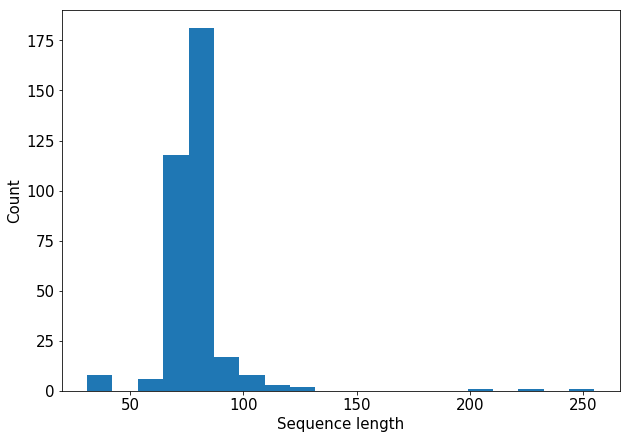

In [46]:
plt.tick_params(
    axis='y')
plt.tick_params(
    axis='x')
plt.hist(sizes, bins=20)
plt.xlabel("Sequence length", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [4]:
sizes = [len(rec.seq) for rec in SeqIO.parse("extra_second_negative_bacteriocin_proper_distribution", "fasta")]
print (len(sizes), min(sizes), max(sizes))

346 30 255


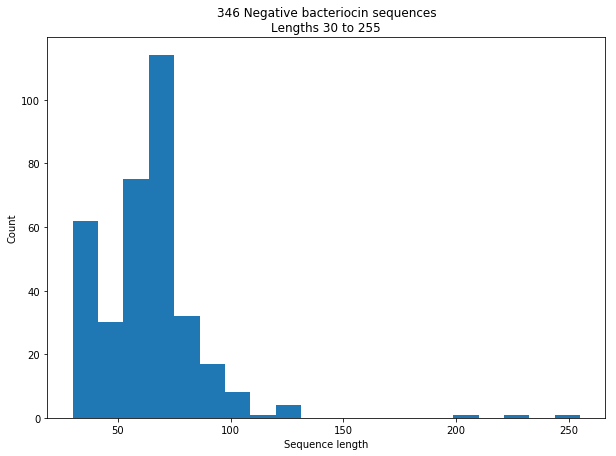

In [5]:
plt.hist(sizes, bins=20)
plt.title("%i Negative bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
plt.xlabel("Sequence length")
plt.ylabel("Count")

plt.show()

999 6 94


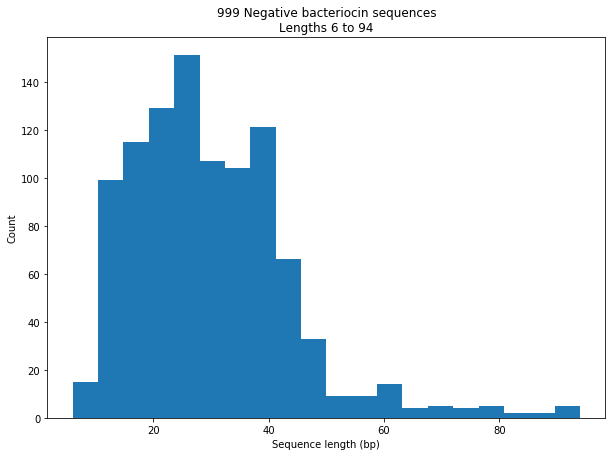

In [31]:
sizes = [len(rec.seq) for rec in SeqIO.parse("neg_antibp2.fa", "fasta")]
print len(sizes), min(sizes), max(sizes)

plt.hist(sizes, bins=20)
plt.title("%i Negative bacteriocin sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")

plt.show()